In [ ]:
print('cnm.estimates.S.shape',cnm.estimates.S.shape)
print('cnm.estimates.idx_components.shape',cnm.estimates.idx_components)
print('cnm.estimates.idx_components_bad.shape',cnm.estimates.idx_components_bad.shape)
len(cnm.estimates.idx_components_bad.shape)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# np.save('filename',file)), np.load('filename',file)
np.save('Cal_temp_C', cnm.estimates.C)
np.save('Cal_spatial_A', cnm.estimates.A)
np.save('Cal_deconvo_S', cnm.estimates.S)
np.save('Cal_residual_YrA', cnm.estimates.YrA)
np.save('cnm.estimates.idx_components',cnm.estimates.idx_components)

#scipy.sparse.save_npz('/tmp/sparse_matrix.npz', sparse_matrix)
#sparse_matrix = scipy.sparse.load_npz('/tmp/sparse_matrix.npz')
import scipy.sparse
scipy.sparse.save_npz('Cal_spatial_A_sparseMatrix',cnm.estimates.A)


Cal_temp_C = np.load('Cal_temp_C.npy')
#Cal_spatial_A = np.load("Cal_spatial_A.npy")
Cal_deconvo_S = np.load('Cal_deconvo_S.npy')
Cal_residual_YrA = np.load('Cal_residual_YrA.npy')
idx_components = np.load('cnm.estimates.idx_components.npy')

figure, ax = plt.subplots()
plt.plot(Cal_temp_C[0])
plt.plot(Cal_deconvo_S[0])
plt.plot(Cal_residual_YrA[0])
plt.legend()
plt.show()

Cal_temp_C = Cal_temp_C[idx_components]

num_row, num_col = Cal_temp_C.shape
print(num_row, num_col)

#visualize all the selected Calcium events
plt.rcParams["figure.figsize"] = [32,64]
figure, ax = plt.subplots(num_row)
for i in range(num_row):
    #print(i)
    ax[i].plot(Cal_temp_C[i])
    
plt.savefig('test_multiple_subplot')

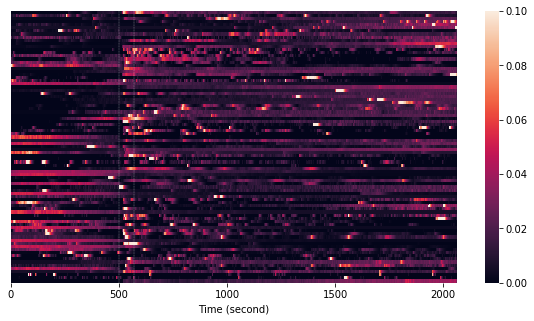

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing



Cal_temp_C = np.load('Cal_temp_C.npy')
idx_components = np.load('cnm.estimates.idx_components.npy')
Cal_temp_C = Cal_temp_C[idx_components] #select good trace
x = Cal_temp_C[:,:]#slicing the pharmacology time, sampling at 1 Hz. 

standardized_X = preprocessing.normalize(x,norm = "l2", axis=1) # row norm, 'L2' not '12'

ax,fig = plt.subplots(figsize=[10,5])
ax = sns.heatmap(standardized_X, vmin=0, vmax=0.1,xticklabels = 500, yticklabels=False)#cmap="YlGnBu"
ax.set(title = '', xlabel = "Time (second)", ylabel='')
#plt.plot([500, 50], [1000, 100], 'white')
plt.axvline(x=(500-1),linewidth=0.25, color='white',linestyle='dashdot')
plt.axvline(x=(573-1),linewidth=0.25, color='white',linestyle='dashdot')
plt.savefig('TCB_test_multiple_subplot2.tif',dpi=300)



plt.show()

